In [1]:
import numpy as np
import pandas as pd

In [2]:
t1 = 'Chennai Super Kings'
t2 = 'Gujarat Titans'

In [3]:
# probabilities of t1 and t2

pb_t1 = [0.33114127317912445, 0.4020263811890652, 0.06522653412349455, 0.0037468935194035556, 0.10816287516727204, 0.04813611164213343, 0.041559931179506786]
    
pb_t2 = [0.3041564792176039, 0.4317848410757946, 0.06063569682151589, 0.0009779951100244498, 0.12371638141809291, 0.03863080684596577, 0.040097799511002445]

In [4]:
pb1_cum_ls = np.cumsum(pb_t1)
pb2_cum_ls = np.cumsum(pb_t2)

In [5]:
pb2_cum_ls, pb1_cum_ls

(array([0.30415648, 0.73594132, 0.79657702, 0.79755501, 0.92127139,
        0.9599022 , 1.        ]),
 array([0.33114127, 0.73316765, 0.79839419, 0.80214108, 0.91030396,
        0.95844007, 1.        ]))

In [6]:
def get_pb_values(teamName):
    
    if teamName == t1:
        p_0 = pb1_cum_ls[0]
        p_1 = pb1_cum_ls[1]
        p_2 = pb1_cum_ls[2]
        p_3 = pb1_cum_ls[3]
        p_4 = pb1_cum_ls[4]
        p_6 = pb1_cum_ls[5]
        p_w = pb1_cum_ls[6]
        
    elif teamName == t2:
        p_0 = pb2_cum_ls[0]
        p_1 = pb2_cum_ls[1]
        p_2 = pb2_cum_ls[2]
        p_3 = pb2_cum_ls[3]
        p_4 = pb2_cum_ls[4]
        p_6 = pb2_cum_ls[5]
        p_w = pb2_cum_ls[6]
        
    return (p_0, p_1, p_2, p_3, p_4, p_6, p_w)

In [7]:
def innings2_runs_pred(curr_score, curr_wks, curr_overs, target):
    
    i1p_0, i1p_1, i1p_2, i1p_3, i1p_4, i1p_6, i1p_w = get_pb_values(t1)
    i2p_0, i2p_1, i2p_2, i2p_3, i2p_4, i2p_6, i2p_w = get_pb_values(t2)
    
    pred_runs = curr_score
    pred_wks = curr_wks
    
    leftover_balls = 120 - curr_overs*6 
    

    for i in range(leftover_balls):
        r_values = np.random.random()

        if r_values <= i2p_0:
            pred_runs += 0
        elif r_values <= i2p_1:
            pred_runs += 1
        elif r_values <= i2p_2:
            pred_runs += 2
        elif r_values <= i2p_3:
            pred_runs += 3
        elif r_values <= i2p_4:
            pred_runs += 4
        elif r_values <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1

            if pred_wks == 10:
                break
        if pred_runs > target:
            break

    return pred_runs

In [8]:
innings2_runs_pred(125, 5, 19, 133)

134

In [9]:
def get_win(innings2_runs_pred, target):
    if innings2_runs_pred > target:
        return 'Win'
    elif innings2_runs_pred == target:
        return 'Tie'
    else:
        return 'Lose'

In [39]:
target = 133
curr_score = 81
curr_wks = 6
curr_overs = 13

pred_runs_ls = []
result_ls = []

win_count = 0
tie_count = 0
lose_count = 0

for i in range(100):
    prediction = innings2_runs_pred(curr_score, curr_wks, curr_overs, target)
    pred_runs_ls.append(prediction)
    
    result = get_win(prediction, target)
    result_ls.append(result)
    
    if result == 'Win':
        win_count += 1
    elif result == 'Tie':
        tie_count += 1
    else:
        lose_count += 1

In [40]:
win_count, tie_count, lose_count

(52, 1, 47)

In [12]:
def find_runs(target, curr_score, curr_wks, at_overs):
    
    run_ls = []
    result_ls = []
    req_runs = []
    win_ls = []
    
    for i in range(curr_score, target + 1):
        win_count = 0
        tie_count = 0
        lose_count = 0
        
        for j in range(100):
            
            prediction = innings2_runs_pred(i, curr_wks, at_overs, target)
            run_ls.append(prediction)
            
            result = get_win(prediction, target)
            result_ls.append(result)
            
            if result == 'Win':
                win_count += 1
            elif result == 'Tie':
                tie_count += 1
            else:
                lose_count += 1
                
            win_ls.append(win_count)
            req_runs.append(i)
            
            
    required_runs = curr_score
    for i in range(len(req_runs)):
        if win_ls[i] >= 50:
            required_runs = req_runs[i]
            break
            
            
    return required_runs
                

In [49]:
find_runs(133, 40, 1, 11)

65

In [124]:
def find_wks(target, curr_score, curr_wks, at_overs):
    
    req_runs = find_runs(target, curr_score, curr_wks, at_overs)
    runs_ls = []
    result_ls = []
    req_wks = []
    win_ls = []
    
    for i in range(curr_wks, 10):
        win_count = 0
        tie_count = 0
        lose_count = 0
        
        for j in range(100):
            
            prediction = innings2_runs_pred(curr_score, i, at_overs, target)
            runs_ls.append(prediction)
            
            result = get_win(prediction, target)
            result_ls.append(result)
            
            if result == 'Win':
                win_count += 1
            elif result == 'Tie':
                tie_count += 1
            else:
                lose_count += 1
                
        win_ls.append(win_count)
        req_wks.append(i)
#         print('wickets: ', i, ' win%: ', win_count)

                
        required_wks = curr_wks

        for i in range(len(req_wks)):
            if (win_ls[i] < 45)  :
                required_wks = req_wks[i]
                break

    return required_wks


In [125]:
find_wks(133, 75, 2, 12)

8

In [126]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

def find_runs_wks(target, curr_wks, at_overs):
    plt.figure(figsize = (16, 6))
    x = np.array(list(range(21)))
    req_runs = find_runs(target, 81, curr_wks, at_overs)
    req_wks = find_wks(target, 81, curr_wks, at_overs)
    
    if at_overs == 10:
        req_value = 81
        req_wk_value = 1

    
    # print(req_value)
    y = np.array([req_runs for i in range(21)])

    # plt.plot(x, current_overs * x + target_score)
    # plt.plot(x, y)
    plt.scatter(at_overs, req_runs, s = 1200, color = 'red')
    plt.axhline(target, ls = '--', color = 'blue')
    plt.text( 1, target + 10, 'Target Score :' + str(target) , color = 'darkblue', fontsize = 13)
    plt.text( at_overs, req_runs, str(req_runs) + '/' + str(req_wks), color = 'white', fontsize = 12,  horizontalalignment='center', verticalalignment='center')
    plt.text(at_overs, req_runs - 30, 'GT has to be at ' + str(req_runs) + '/' +  str(req_wks) + ' after ' + str(at_overs) + ' overs', horizontalalignment='center')
    plt.ylim(50, target + 50)
    plt.xticks(x)
    plt.title('Where should GT be?', fontsize = 20)
    plt.xlabel('Overs')
    plt.ylabel('Score')
    plt.show()


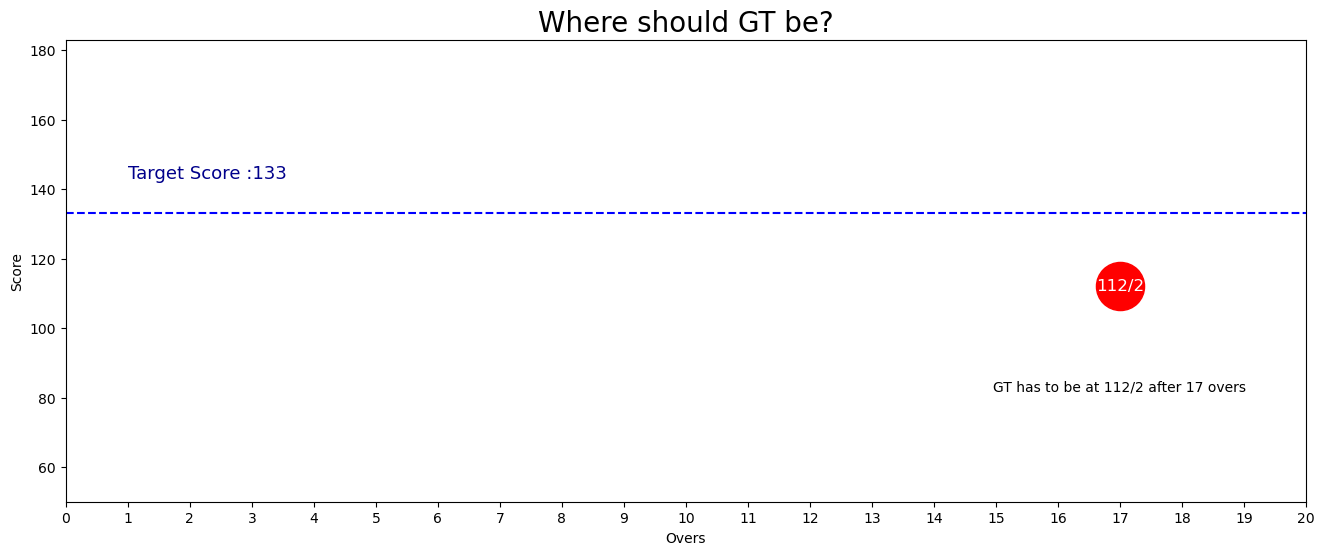

In [127]:
find_runs_wks(133, 2, 17)

In [129]:
print('current_score = GT: 81/1 (10 overs)')
print('')

interactive_plot = interactive(find_runs_wks, curr_wks = widgets.IntSlider(min=1, max=10, step=1, value=1),  at_overs=widgets.IntSlider(min=10, max=20, step=1, value=10), target = widgets.IntSlider(min=0, max=250, step=1, value=133))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

current_score = GT: 81/1 (10 overs)



interactive(children=(IntSlider(value=133, description='target', max=250), IntSlider(value=1, description='cur…